In [213]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from calibration import calibrationFunctions as cal
from tweezepy import AV, PSD, MLE

### Good Beads
1, maybe 3, 4

### Bad Beads
2 is a multi

Using: ../Data\2025\April\24\100 fM with BSA\1\DataTSV


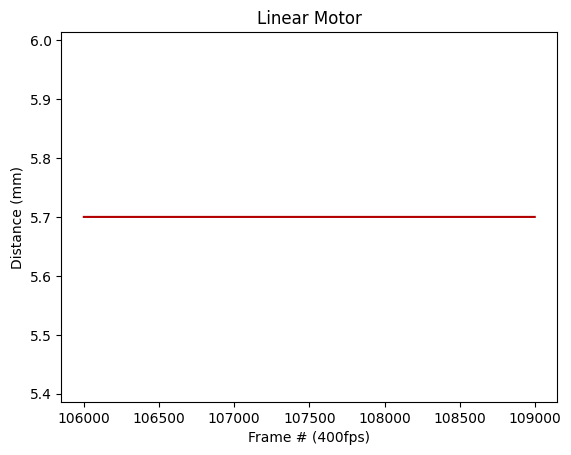

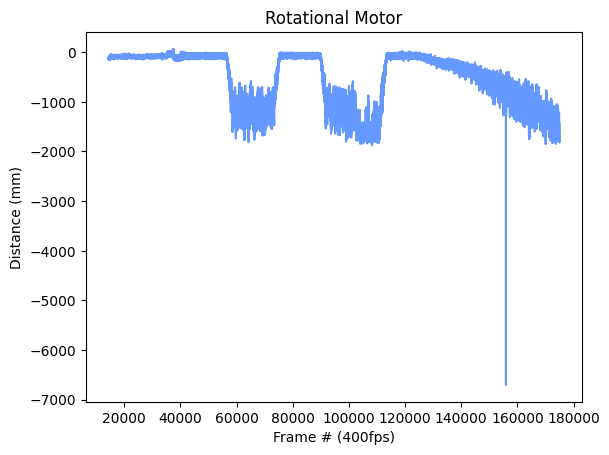

In [214]:
# folderPath = r"C:\Users\Perkins Lab\Desktop\Caleb Maddry\Data\2025\April\24\100 fM with BSA\1\DataTSV";
folderPath = r"../Data\2025\April\24\100 fM with BSA\1\DataTSV"

dataFrame = cal.openFiles(folderPath, numRef=2, numExp=4, fps=400) # 5 total beads

lowStart = 60000
lowEnd = 70000

lowStart = 106000
lowEnd = 109000

highStart = 120000
highEnd = 125000

forceExtStart = 126000
forceExtEnd = 175000

spinStart = 183000
spinEnd = 200000

plt.plot(dataFrame["linearMotor"][106000:109000], color="#b30000")
plt.xlabel("Frame # (400fps)"); plt.ylabel("Distance (mm)"); plt.title("Linear Motor")
plt.show()

plt.plot(dataFrame["zExpBead4"][10000:175000] - dataFrame["zRefBead1"][10000:175000], color="#6699ff")
plt.xlabel("Frame # (400fps)"); plt.ylabel("Distance (mm)"); plt.title("Rotational Motor")
plt.show()

# Bead 2

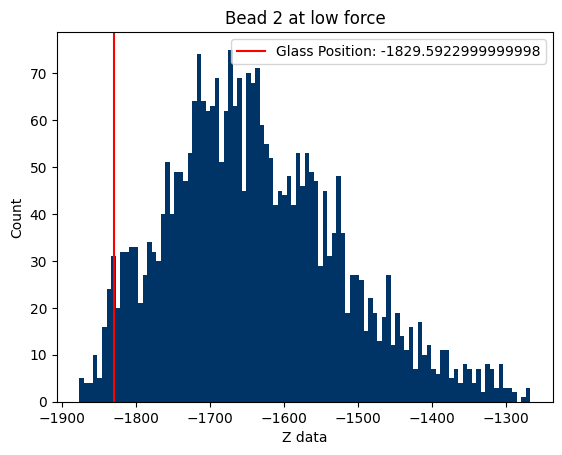

In [215]:
ref = dataFrame["zRefBead1"][lowStart:lowEnd]
exp = dataFrame["zExpBead2"][lowStart:lowEnd]

glassPosition = np.mean(np.sort(exp - ref)[0:200])

plt.hist(exp - ref, bins=100, color="#003366")
plt.axvline(glassPosition, color="red", label=f"Glass Position: {glassPosition}")
plt.title("Bead 2 at low force"); plt.xlabel("Z data"); plt.ylabel("Count")
plt.legend()
plt.show()

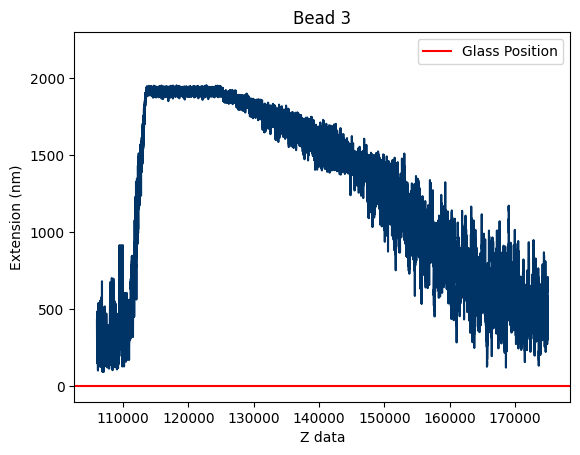

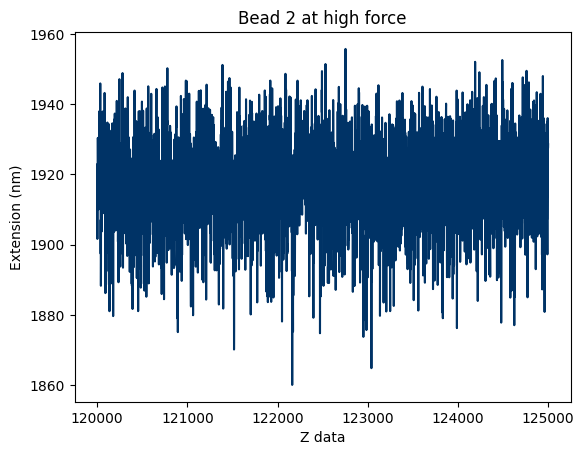

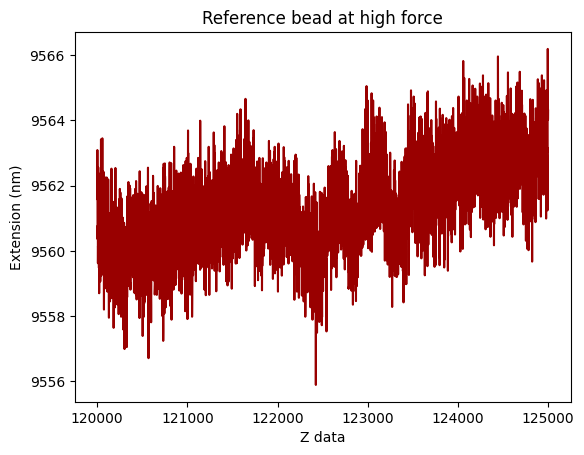

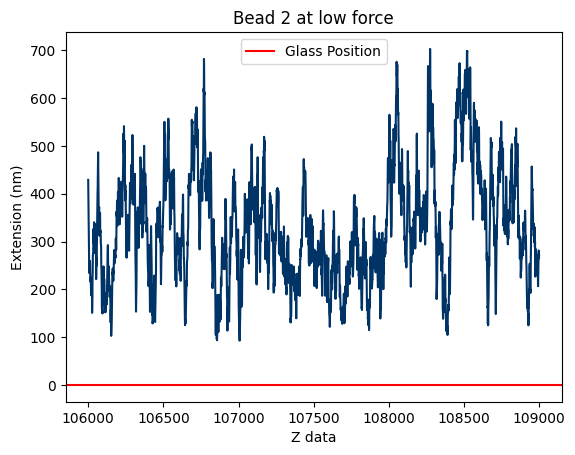

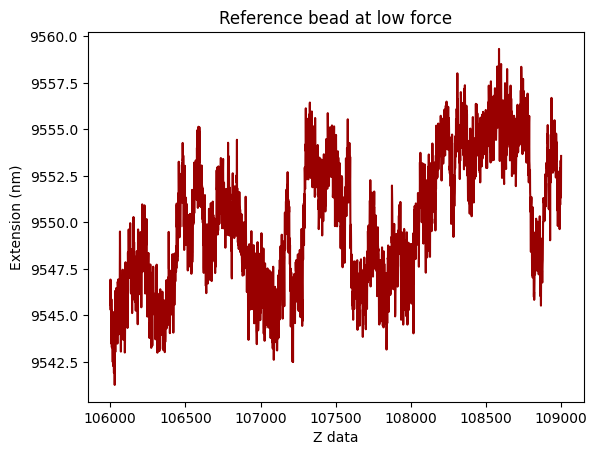

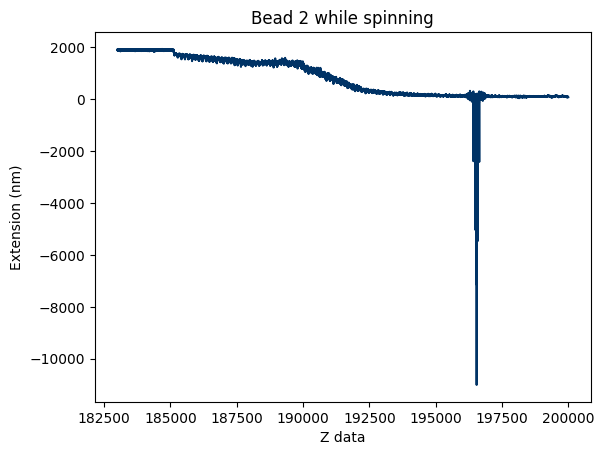

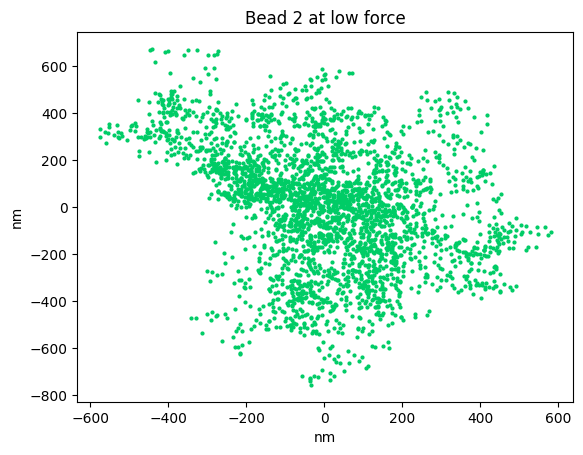

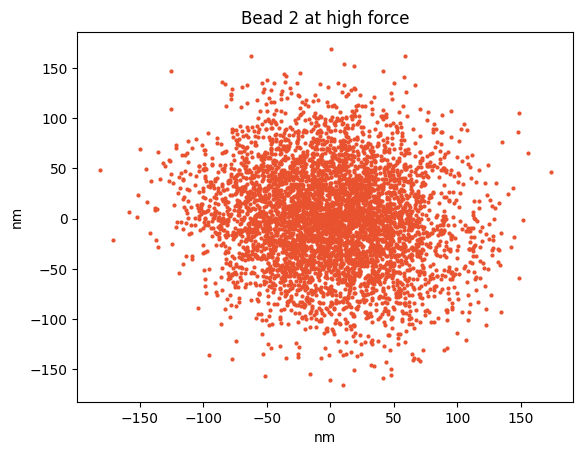

In [216]:
extension = dataFrame["zExpBead2"] - dataFrame["zRefBead1"] - glassPosition +140
beadX = dataFrame["xExpBead2"] - dataFrame["xRefBead1"]
beadY = dataFrame["yExpBead2"] - dataFrame["yRefBead1"]

plt.plot(extension[lowStart:forceExtEnd], color="#003366")
plt.axhline(0, color="red", label="Glass Position")
plt.title("Bead 3"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.ylim(-100,2300)
plt.legend()
plt.show()

plt.plot(extension[highStart:highEnd], color="#003366")
plt.title("Bead 2 at high force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(dataFrame["zRefBead1"][highStart:highEnd], color="#990000")
plt.title("Reference bead at high force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(extension[lowStart:lowEnd], color="#003366")
plt.title("Bead 2 at low force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.axhline(0, color="red", label="Glass Position")
plt.legend()
plt.show()

plt.plot(dataFrame["zRefBead1"][lowStart:lowEnd], color="#990000")
plt.title("Reference bead at low force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(extension[spinStart:spinEnd], color="#003366")
plt.title("Bead 2 while spinning"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.scatter(beadX[lowStart:lowEnd] - np.mean(beadX[lowStart:lowEnd]), beadY[lowStart:lowEnd] - np.mean(beadY[lowStart:lowEnd]), s=4, color='#00cc66')
plt.title("Bead 2 at low force"); plt.xlabel("nm"); plt.ylabel("nm")
plt.show()

plt.scatter(beadX[highStart:highEnd] - np.mean(beadX[highStart:highEnd]), beadY[highStart:highEnd] - np.mean(beadY[highStart:highEnd]), s=4, color='#E9522F')
plt.title("Bead 2 at high force"); plt.xlabel("nm"); plt.ylabel("nm")
plt.show()

Low force using AV:  0.03647029110596392
Low force using PSD:  0.03694734468918861
Low force using F = KbT*L/<x>:  0.032815288501296155


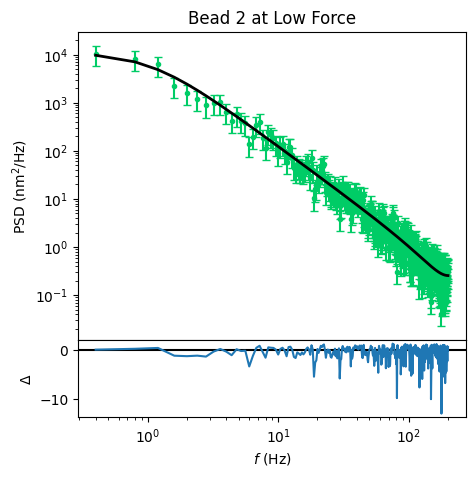

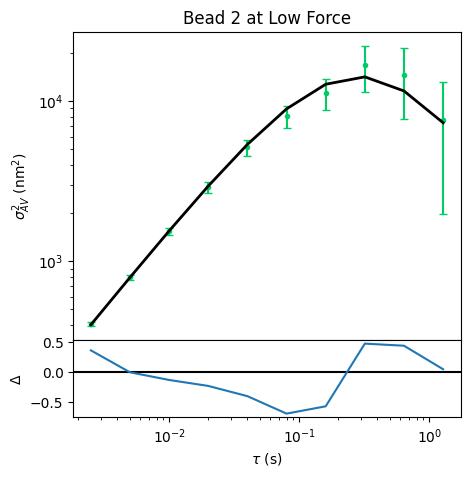

High force using AV:  2.865575688986457
High force using PSD:  2.9868511244788363
High force using F = KbT*L/<x>:  3.114175047109439


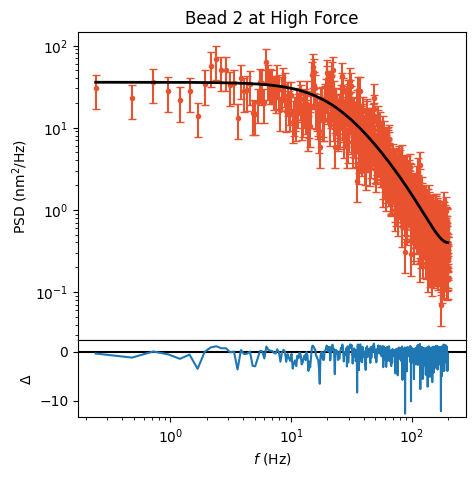

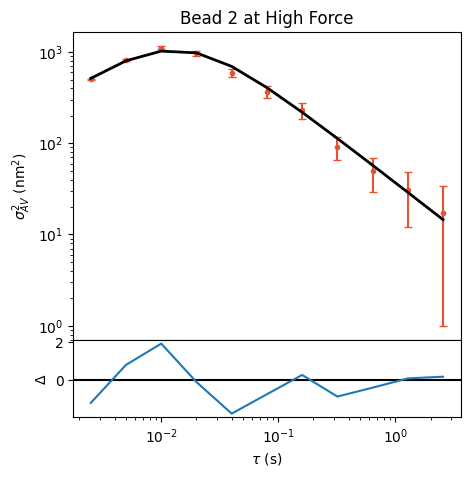

In [217]:
beadDiameter = 1000
fps = 400

# Math
psd = PSD(beadX[lowStart:lowEnd], fps, bins=5)
psd.mlefit(viscosity=1e-9, radius=beadDiameter/2)
av = AV(beadX[lowStart:lowEnd], fps)
av.mlefit(viscosity=1e-9, radius=beadDiameter/2)

# Calculation and printing of the force
force = av.results['k']*np.mean(extension[lowStart:lowEnd])
print('Low force using AV: ', force)
force = psd.results['k']*np.mean(extension[lowStart:lowEnd])
print('Low force using PSD: ', force)
force = 4.1*np.mean(extension[lowStart:lowEnd])/np.var(beadX[lowStart:lowEnd])
print('Low force using F = KbT*L/<x>: ', force)

# Printing of PSD and AV Plots
fig, ax = psd.plot(data_color='#00cc66') #PSD
ax[0].set_title('Bead 2 at Low Force'); ax[0].set_xlabel('f (Hz)');
plt.show()

fig, ax = av.plot(data_color='#00cc66') #AV
ax[0].set_title('Bead 2 at Low Force')
plt.show()

# Math
psd = PSD(beadX[highStart:highEnd], fps, bins=5)
psd.mlefit(viscosity=1e-9, radius=beadDiameter/2)
av = AV(beadX[highStart:highEnd], fps)
av.mlefit(viscosity=1e-9, radius=beadDiameter/2)


# Calculation and printing of the force
force = av.results['k']*np.mean(extension[highStart:highEnd])
print('High force using AV: ', force)
force = psd.results['k']*np.mean(extension[highStart:highEnd])
print('High force using PSD: ', force)
force = 4.1*np.mean(extension[highStart:highEnd])/np.var(beadY[highStart:highEnd])
print('High force using F = KbT*L/<x>: ', force)

# Printing of PSD and AV Plots
fig, ax = psd.plot(data_color='#E9522F') #PSD
ax[0].set_title('Bead 2 at High Force'); ax[0].set_xlabel('f (Hz)');
plt.show()

fig, ax = av.plot(data_color='#E9522F') #AV
ax[0].set_title('Bead 2 at High Force')
plt.show()

# Bead 1

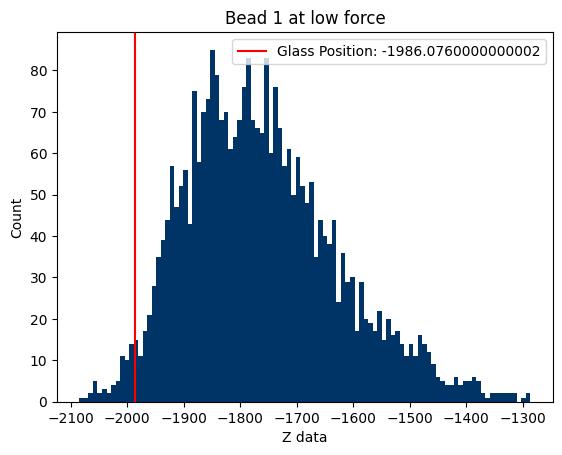

In [218]:
ref = dataFrame["zRefBead1"][lowStart:lowEnd]
exp = dataFrame["zExpBead1"][lowStart:lowEnd]

glassPosition = np.mean(np.sort(exp - ref)[0:150])

plt.hist(exp - ref, bins=100, color="#003366")
plt.axvline(glassPosition, color="red", label=f"Glass Position: {glassPosition}")
plt.title("Bead 1 at low force"); plt.xlabel("Z data"); plt.ylabel("Count")
plt.legend()
plt.show()

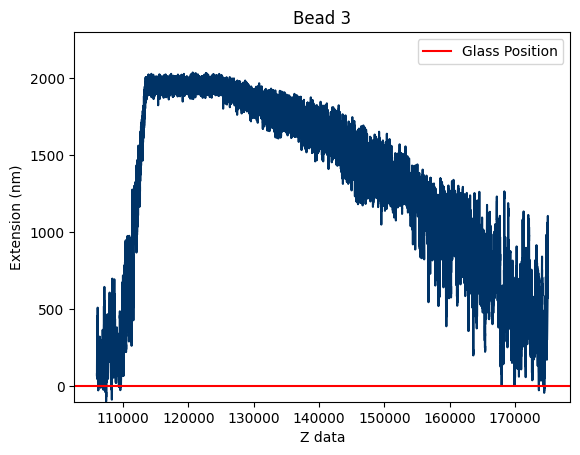

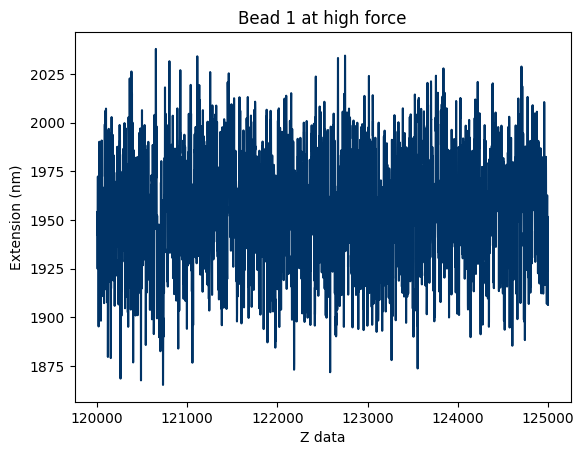

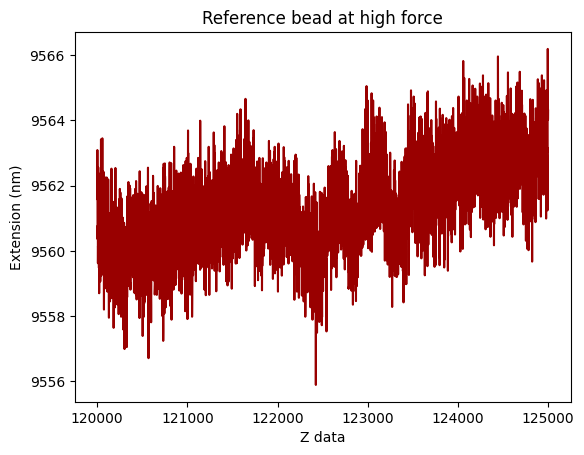

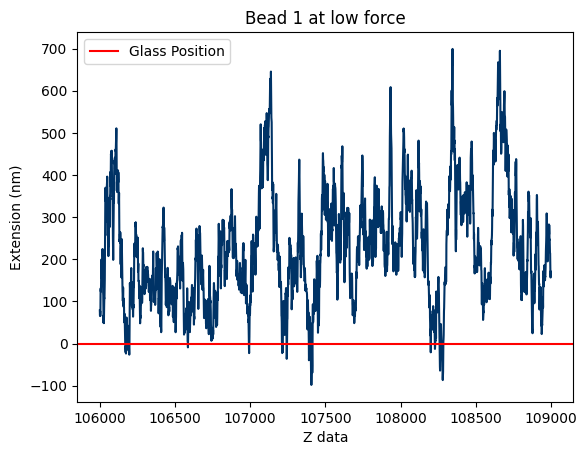

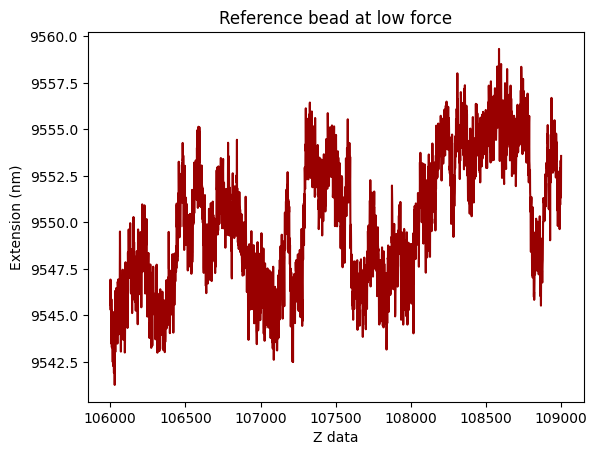

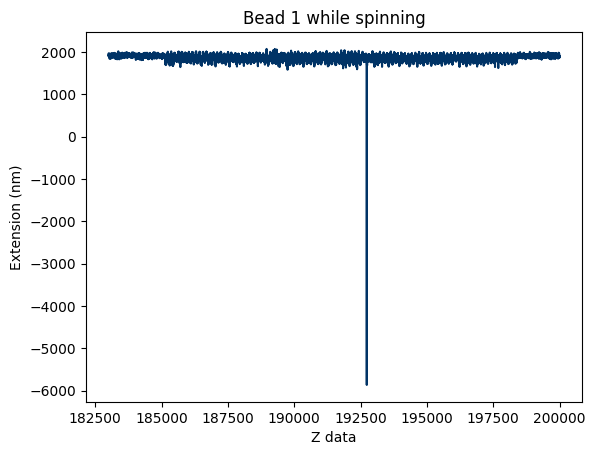

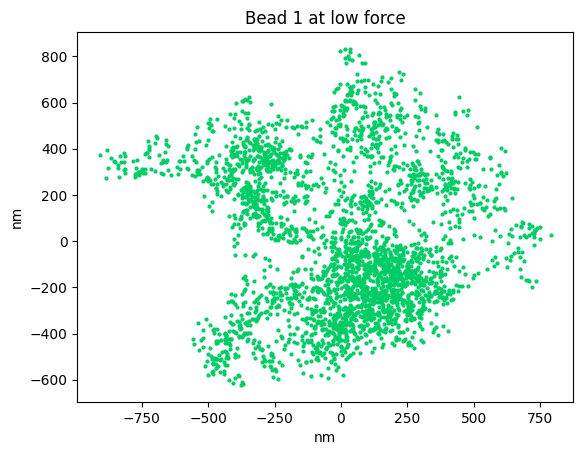

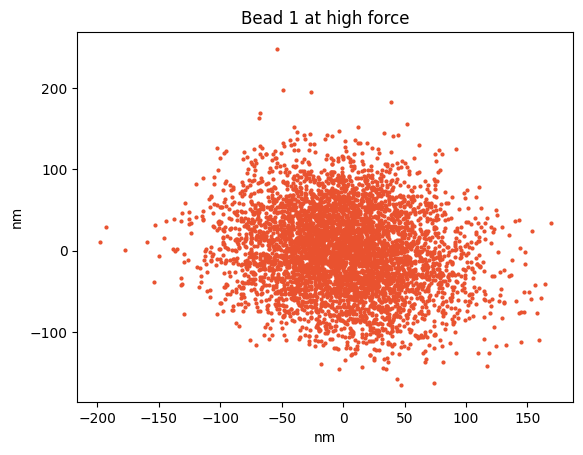

In [219]:
extension = dataFrame["zExpBead1"] - dataFrame["zRefBead1"] - glassPosition
beadX = dataFrame["xExpBead1"] - dataFrame["xRefBead1"]
beadY = dataFrame["yExpBead1"] - dataFrame["yRefBead1"]

plt.plot(extension[lowStart:forceExtEnd], color="#003366")
plt.axhline(0, color="red", label="Glass Position")
plt.title("Bead 3"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.ylim(-100,2300)
plt.legend()
plt.show()

plt.plot(extension[highStart:highEnd], color="#003366")
plt.title("Bead 1 at high force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(dataFrame["zRefBead1"][highStart:highEnd], color="#990000")
plt.title("Reference bead at high force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(extension[lowStart:lowEnd], color="#003366")
plt.title("Bead 1 at low force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.axhline(0, color="red", label="Glass Position")
plt.legend()
plt.show()

plt.plot(dataFrame["zRefBead1"][lowStart:lowEnd], color="#990000")
plt.title("Reference bead at low force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(extension[spinStart:spinEnd], color="#003366")
plt.title("Bead 1 while spinning"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.scatter(beadX[lowStart:lowEnd] - np.mean(beadX[lowStart:lowEnd]), beadY[lowStart:lowEnd] - np.mean(beadY[lowStart:lowEnd]), s=4, color='#00cc66')
plt.title("Bead 1 at low force"); plt.xlabel("nm"); plt.ylabel("nm")
plt.show()

plt.scatter(beadX[highStart:highEnd] - np.mean(beadX[highStart:highEnd]), beadY[highStart:highEnd] - np.mean(beadY[highStart:highEnd]), s=4, color='#E9522F')
plt.title("Bead 1 at high force"); plt.xlabel("nm"); plt.ylabel("nm")
plt.show()

Low force using AV:  0.006261927472185771
Low force using PSD:  -0.005031426215720305
Low force using F = KbT*L/<x>:  0.010886768449089422


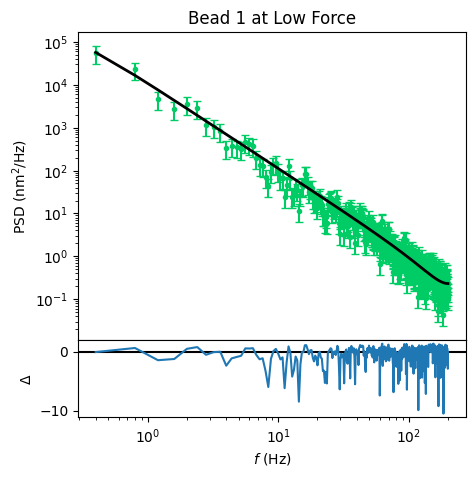

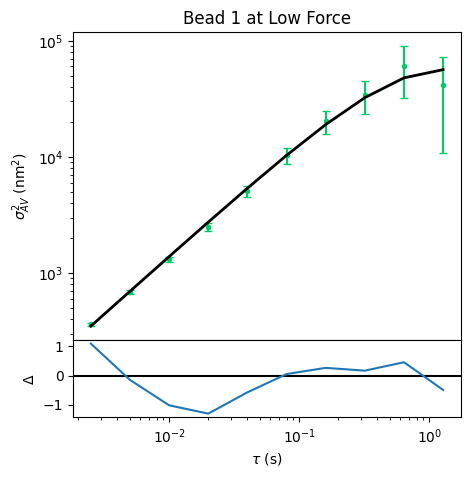

High force using AV:  3.224645316276869
High force using PSD:  3.2037205283461816
High force using F = KbT*L/<x>:  2.9600810037769936


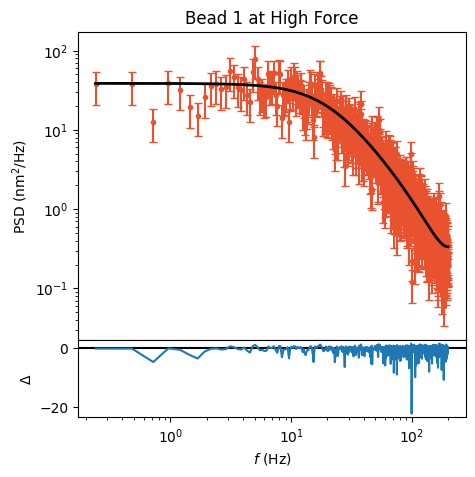

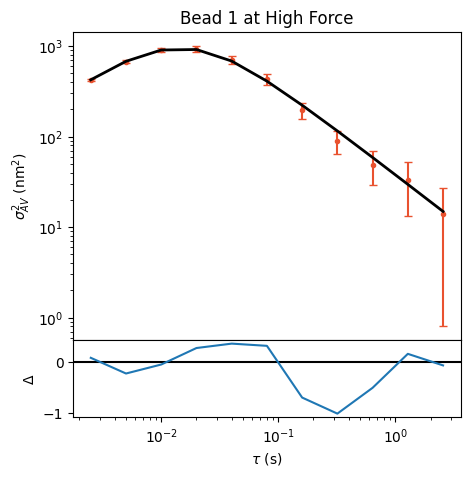

In [220]:
beadDiameter = 1000
fps = 400

# Math
psd = PSD(beadX[lowStart:lowEnd], fps, bins=5)
psd.mlefit(viscosity=1e-9, radius=beadDiameter/2)
av = AV(beadX[lowStart:lowEnd], fps)
av.mlefit(viscosity=1e-9, radius=beadDiameter/2)

# Calculation and printing of the force
force = av.results['k']*np.mean(extension[lowStart:lowEnd])
print('Low force using AV: ', force)
force = psd.results['k']*np.mean(extension[lowStart:lowEnd])
print('Low force using PSD: ', force)
force = 4.1*np.mean(extension[lowStart:lowEnd])/np.var(beadX[lowStart:lowEnd])
print('Low force using F = KbT*L/<x>: ', force)

# Printing of PSD and AV Plots
fig, ax = psd.plot(data_color='#00cc66') #PSD
ax[0].set_title('Bead 1 at Low Force'); ax[0].set_xlabel('f (Hz)');
plt.show()

fig, ax = av.plot(data_color='#00cc66') #AV
ax[0].set_title('Bead 1 at Low Force')
plt.show()

# Math
psd = PSD(beadX[highStart:highEnd], fps, bins=5)
psd.mlefit(viscosity=1e-9, radius=beadDiameter/2)
av = AV(beadX[highStart:highEnd], fps)
av.mlefit(viscosity=1e-9, radius=beadDiameter/2)


# Calculation and printing of the force
force = av.results['k']*np.mean(extension[highStart:highEnd])
print('High force using AV: ', force)
force = psd.results['k']*np.mean(extension[highStart:highEnd])
print('High force using PSD: ', force)
force = 4.1*np.mean(extension[highStart:highEnd])/np.var(beadY[highStart:highEnd])
print('High force using F = KbT*L/<x>: ', force)

# Printing of PSD and AV Plots
fig, ax = psd.plot(data_color='#E9522F') #PSD
ax[0].set_title('Bead 1 at High Force'); ax[0].set_xlabel('f (Hz)');
plt.show()

fig, ax = av.plot(data_color='#E9522F') #AV
ax[0].set_title('Bead 1 at High Force')
plt.show()

# Bead 3

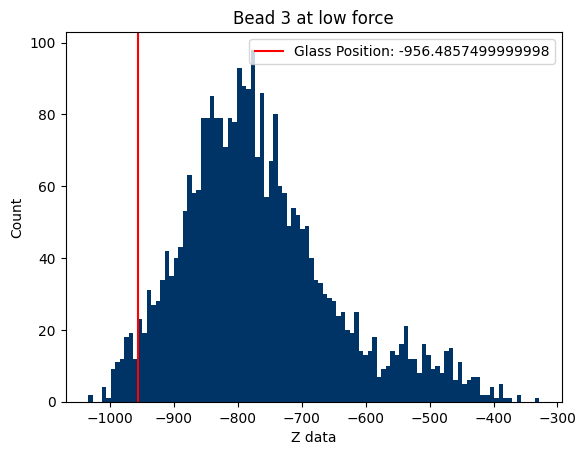

In [221]:
ref = dataFrame["zRefBead1"][lowStart:lowEnd]
exp = dataFrame["zExpBead3"][lowStart:lowEnd]

glassPosition = np.mean(np.sort(exp - ref)[0:200])

plt.hist(exp - ref, bins=100, color="#003366")
plt.axvline(glassPosition, color="red", label=f"Glass Position: {glassPosition}")
plt.title("Bead 3 at low force"); plt.xlabel("Z data"); plt.ylabel("Count")
plt.legend()
plt.show()

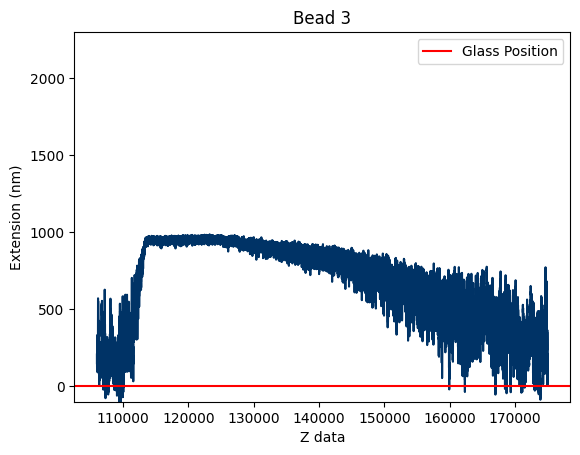

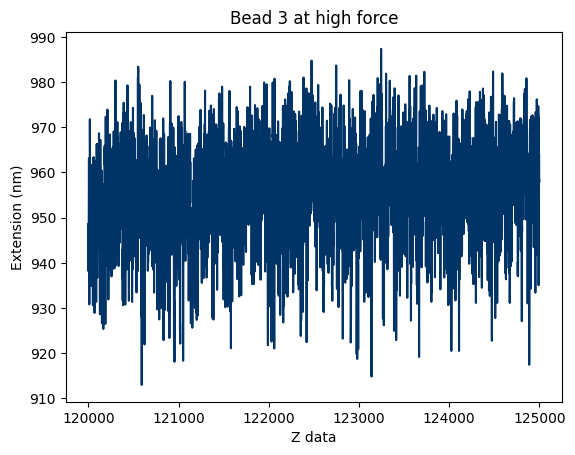

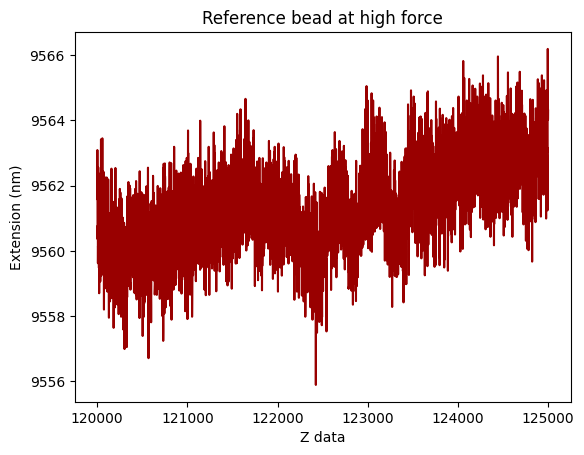

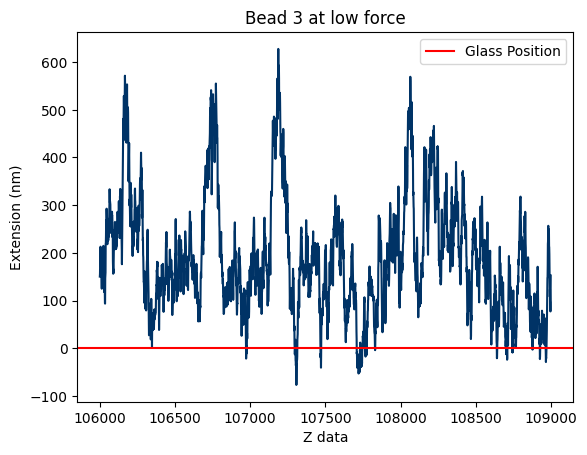

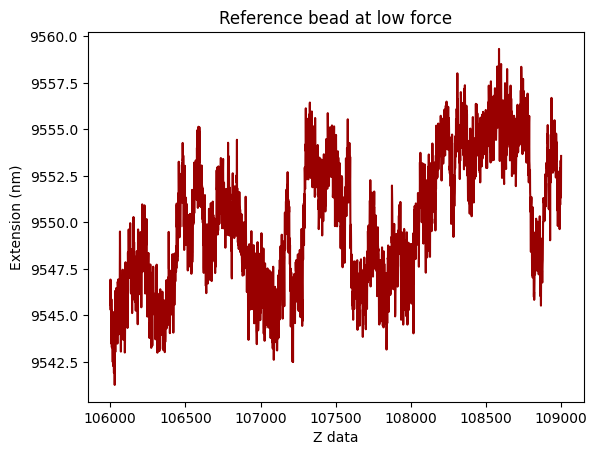

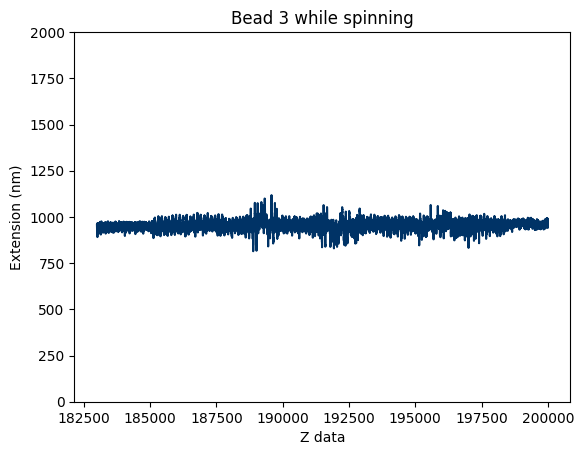

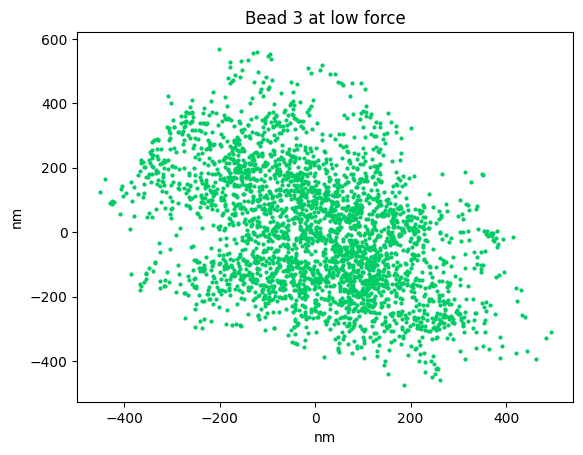

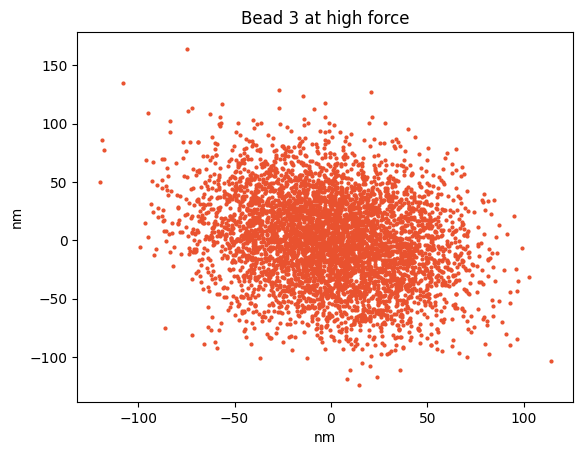

In [222]:
extension = dataFrame["zExpBead3"] - dataFrame["zRefBead1"] - glassPosition
beadX = dataFrame["xExpBead3"] - dataFrame["xRefBead1"]
beadY = dataFrame["yExpBead3"] - dataFrame["yRefBead1"]

plt.plot(extension[lowStart:forceExtEnd], color="#003366")
plt.axhline(0, color="red", label="Glass Position")
plt.title("Bead 3"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.ylim(-100,2300)
plt.legend()
plt.show()

plt.plot(extension[highStart:highEnd], color="#003366")
plt.title("Bead 3 at high force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(dataFrame["zRefBead1"][highStart:highEnd], color="#990000")
plt.title("Reference bead at high force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(extension[lowStart:lowEnd], color="#003366")
plt.title("Bead 3 at low force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.axhline(0, color="red", label="Glass Position")
plt.legend()
plt.show()

plt.plot(dataFrame["zRefBead1"][lowStart:lowEnd], color="#990000")
plt.title("Reference bead at low force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(extension[spinStart:spinEnd], color="#003366")
plt.title("Bead 3 while spinning"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.ylim(0,2000)
plt.show()

plt.scatter(beadX[lowStart:lowEnd] - np.mean(beadX[lowStart:lowEnd]), beadY[lowStart:lowEnd] - np.mean(beadY[lowStart:lowEnd]), s=4, color='#00cc66')
plt.title("Bead 3 at low force"); plt.xlabel("nm"); plt.ylabel("nm")
plt.show()

plt.scatter(beadX[highStart:highEnd] - np.mean(beadX[highStart:highEnd]), beadY[highStart:highEnd] - np.mean(beadY[highStart:highEnd]), s=4, color='#E9522F')
plt.title("Bead 3 at high force"); plt.xlabel("nm"); plt.ylabel("nm")
plt.show()

Low force using AV:  0.031245580965520457
Low force using PSD:  0.03000212696729135
Low force using F = KbT*L/<x>:  0.029020942785896592


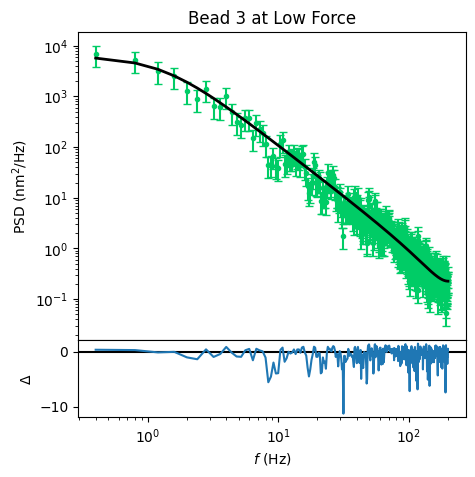

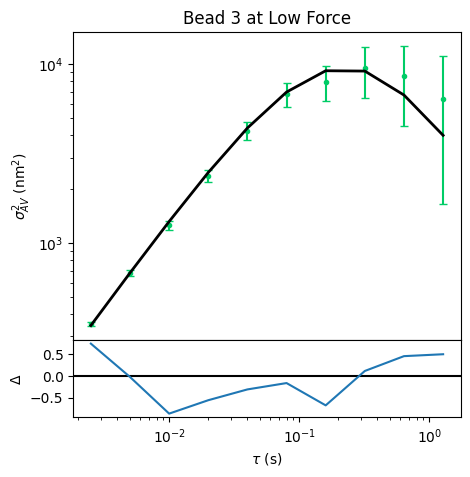

High force using AV:  2.8978030013040166
High force using PSD:  2.9028448287127335
High force using F = KbT*L/<x>:  2.6719106394584613


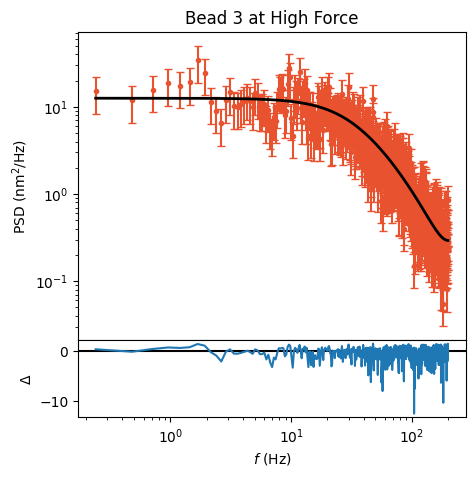

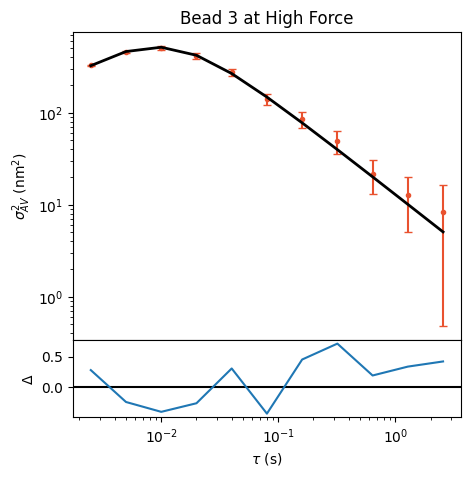

In [223]:
beadDiameter = 1000
fps = 400

# Math
psd = PSD(beadX[lowStart:lowEnd], fps, bins=5)
psd.mlefit(viscosity=1e-9, radius=beadDiameter/2)
av = AV(beadX[lowStart:lowEnd], fps)
av.mlefit(viscosity=1e-9, radius=beadDiameter/2)

# Calculation and printing of the force
force = av.results['k']*np.mean(extension[lowStart:lowEnd])
print('Low force using AV: ', force)
force = psd.results['k']*np.mean(extension[lowStart:lowEnd])
print('Low force using PSD: ', force)
force = 4.1*np.mean(extension[lowStart:lowEnd])/np.var(beadX[lowStart:lowEnd])
print('Low force using F = KbT*L/<x>: ', force)

# Printing of PSD and AV Plots
fig, ax = psd.plot(data_color='#00cc66') #PSD
ax[0].set_title('Bead 3 at Low Force'); ax[0].set_xlabel('f (Hz)');
plt.show()

fig, ax = av.plot(data_color='#00cc66') #AV
ax[0].set_title('Bead 3 at Low Force')
plt.show()

# Math
psd = PSD(beadX[highStart:highEnd], fps, bins=5)
psd.mlefit(viscosity=1e-9, radius=beadDiameter/2)
av = AV(beadX[highStart:highEnd], fps)
av.mlefit(viscosity=1e-9, radius=beadDiameter/2)


# Calculation and printing of the force
force = av.results['k']*np.mean(extension[highStart:highEnd])
print('High force using AV: ', force)
force = psd.results['k']*np.mean(extension[highStart:highEnd])
print('High force using PSD: ', force)
force = 4.1*np.mean(extension[highStart:highEnd])/np.var(beadY[highStart:highEnd])
print('High force using F = KbT*L/<x>: ', force)

# Printing of PSD and AV Plots
fig, ax = psd.plot(data_color='#E9522F') #PSD
ax[0].set_title('Bead 3 at High Force'); ax[0].set_xlabel('f (Hz)');
plt.show()

fig, ax = av.plot(data_color='#E9522F') #AV
ax[0].set_title('Bead 3 at High Force')
plt.show()

# Bead 4

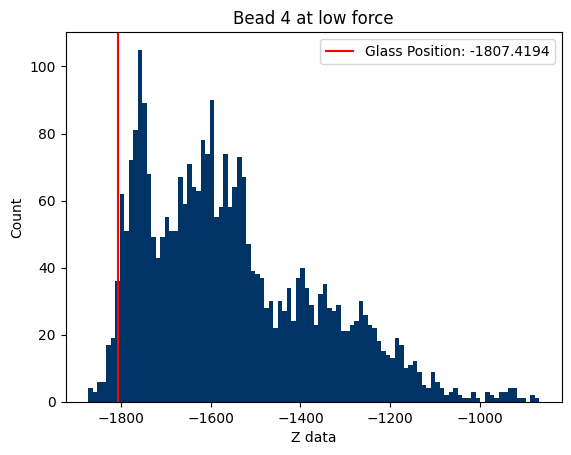

In [224]:
ref = dataFrame["zRefBead1"][lowStart:lowEnd]
exp = dataFrame["zExpBead4"][lowStart:lowEnd]

glassPosition = np.mean(np.sort(exp - ref)[0:200])

plt.hist(exp - ref, bins=100, color="#003366")
plt.axvline(glassPosition, color="red", label=f"Glass Position: {glassPosition}")
plt.title("Bead 4 at low force"); plt.xlabel("Z data"); plt.ylabel("Count")
plt.legend()
plt.show()

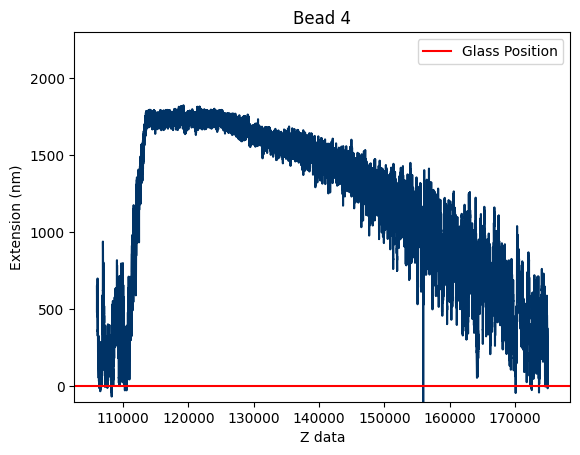

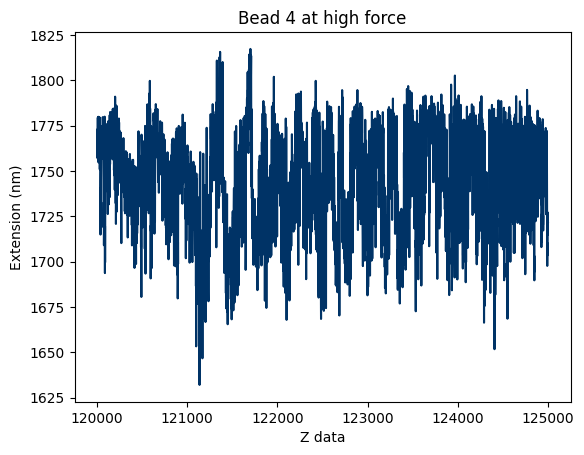

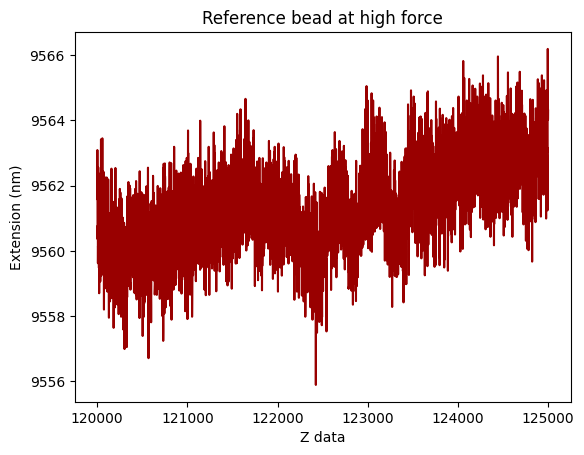

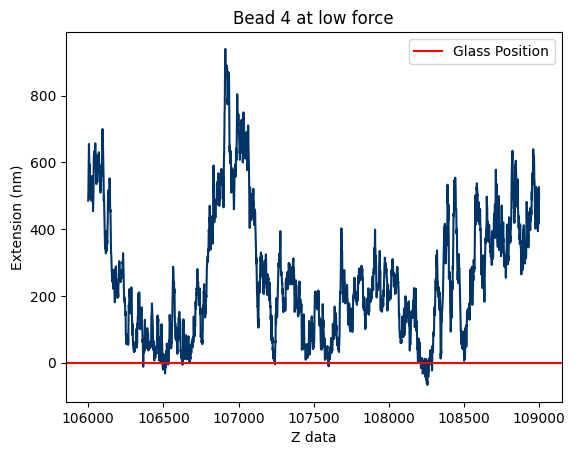

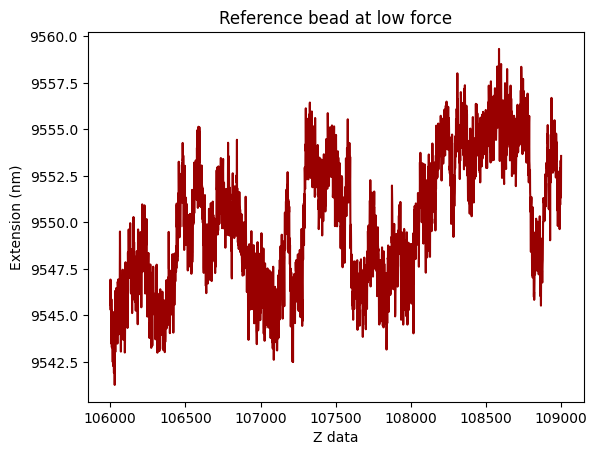

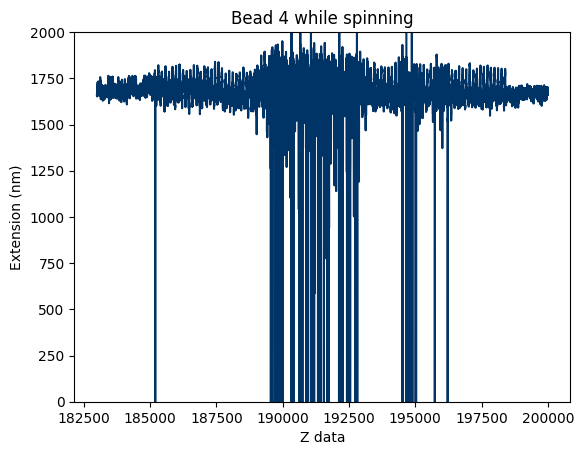

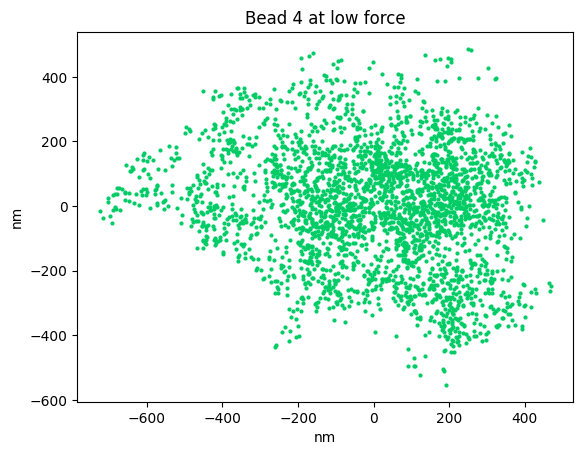

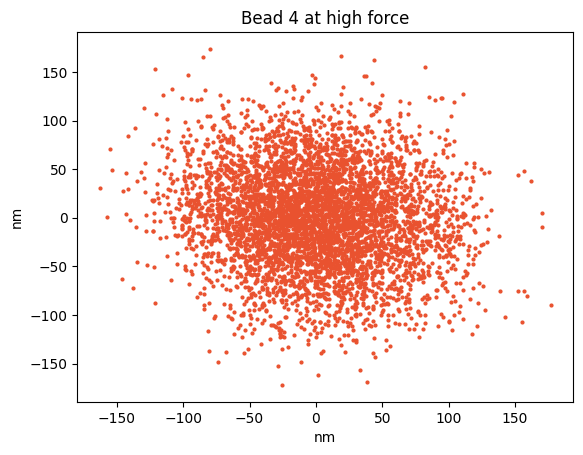

In [225]:
extension = dataFrame["zExpBead4"] - dataFrame["zRefBead1"] - glassPosition
beadX = dataFrame["xExpBead4"] - dataFrame["xRefBead1"]
beadY = dataFrame["yExpBead4"] - dataFrame["yRefBead1"]

plt.plot(extension[lowStart:forceExtEnd], color="#003366")
plt.axhline(0, color="red", label="Glass Position")
plt.title("Bead 4"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.ylim(-100,2300)
plt.legend()
plt.show()

plt.plot(extension[highStart:highEnd], color="#003366")
plt.title("Bead 4 at high force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(dataFrame["zRefBead1"][highStart:highEnd], color="#990000")
plt.title("Reference bead at high force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(extension[lowStart:lowEnd], color="#003366")
plt.title("Bead 4 at low force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.axhline(0, color="red", label="Glass Position")
plt.legend()
plt.show()

plt.plot(dataFrame["zRefBead1"][lowStart:lowEnd], color="#990000")
plt.title("Reference bead at low force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(extension[spinStart:spinEnd], color="#003366")
plt.title("Bead 4 while spinning"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.ylim(0,2000)
plt.show()

plt.scatter(beadX[lowStart:lowEnd] - np.mean(beadX[lowStart:lowEnd]), beadY[lowStart:lowEnd] - np.mean(beadY[lowStart:lowEnd]), s=4, color='#00cc66')
plt.title("Bead 4 at low force"); plt.xlabel("nm"); plt.ylabel("nm")
plt.show()

plt.scatter(beadX[highStart:highEnd] - np.mean(beadX[highStart:highEnd]), beadY[highStart:highEnd] - np.mean(beadY[highStart:highEnd]), s=4, color='#E9522F')
plt.title("Bead 4 at high force"); plt.xlabel("nm"); plt.ylabel("nm")
plt.show()

Low force using AV:  0.021247483681697533
Low force using PSD:  0.02933027880980284
Low force using F = KbT*L/<x>:  0.019470001133833816


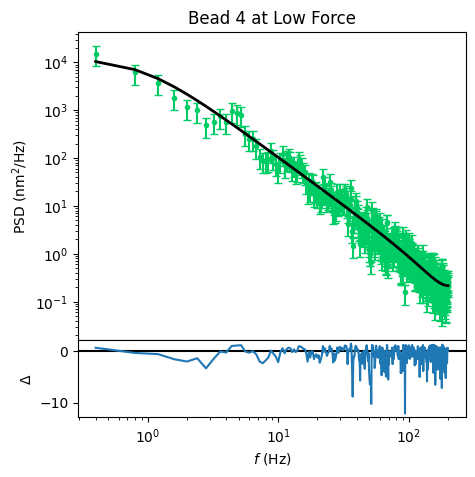

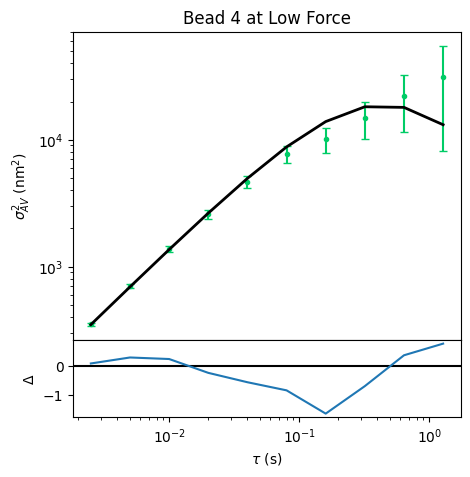

High force using AV:  2.5297738507085166
High force using PSD:  2.533105776341317
High force using F = KbT*L/<x>:  2.797028439647554


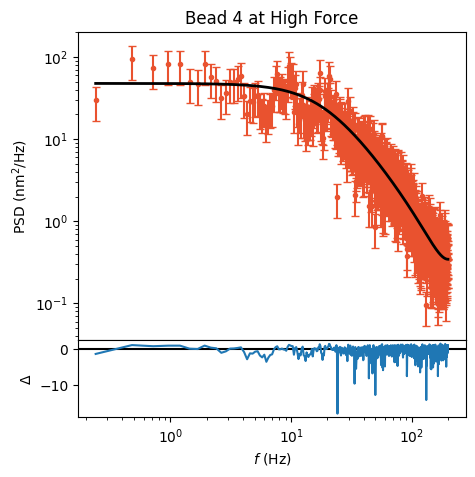

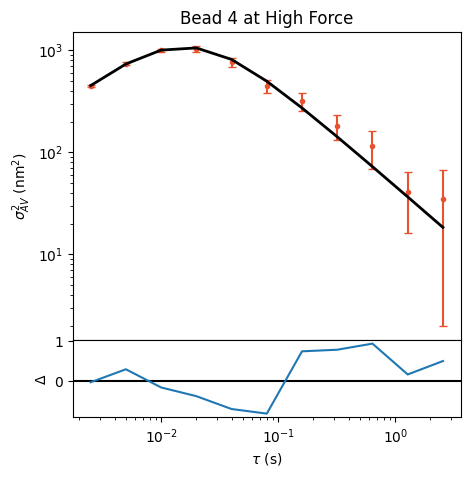

In [226]:
beadDiameter = 1000
fps = 400

# Math
psd = PSD(beadX[lowStart:lowEnd], fps, bins=5)
psd.mlefit(viscosity=1e-9, radius=beadDiameter/2)
av = AV(beadX[lowStart:lowEnd], fps)
av.mlefit(viscosity=1e-9, radius=beadDiameter/2)

# Calculation and printing of the force
force = av.results['k']*np.mean(extension[lowStart:lowEnd])
print('Low force using AV: ', force)
force = psd.results['k']*np.mean(extension[lowStart:lowEnd])
print('Low force using PSD: ', force)
force = 4.1*np.mean(extension[lowStart:lowEnd])/np.var(beadX[lowStart:lowEnd])
print('Low force using F = KbT*L/<x>: ', force)

# Printing of PSD and AV Plots
fig, ax = psd.plot(data_color='#00cc66') #PSD
ax[0].set_title('Bead 4 at Low Force'); ax[0].set_xlabel('f (Hz)');
plt.show()

fig, ax = av.plot(data_color='#00cc66') #AV
ax[0].set_title('Bead 4 at Low Force')
plt.show()

# Math
psd = PSD(beadX[highStart:highEnd], fps, bins=5)
psd.mlefit(viscosity=1e-9, radius=beadDiameter/2)
av = AV(beadX[highStart:highEnd], fps)
av.mlefit(viscosity=1e-9, radius=beadDiameter/2)


# Calculation and printing of the force
force = av.results['k']*np.mean(extension[highStart:highEnd])
print('High force using AV: ', force)
force = psd.results['k']*np.mean(extension[highStart:highEnd])
print('High force using PSD: ', force)
force = 4.1*np.mean(extension[highStart:highEnd])/np.var(beadY[highStart:highEnd])
print('High force using F = KbT*L/<x>: ', force)

# Printing of PSD and AV Plots
fig, ax = psd.plot(data_color='#E9522F') #PSD
ax[0].set_title('Bead 4 at High Force'); ax[0].set_xlabel('f (Hz)');
plt.show()

fig, ax = av.plot(data_color='#E9522F') #AV
ax[0].set_title('Bead 4 at High Force')
plt.show()